Name: Kemal Demirel

ID: 191104091

Course: BIL470

Homework_2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from LR import Linear_Regression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Exploratory Data Analysis (EDA)

In [2]:
dataset = pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")
dataset = dataset.drop(columns="Gender")


In [3]:
display(dataset);

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3
...,...,...,...
495,150,153,5
496,184,121,4
497,141,136,5
498,150,95,5


In [4]:
print("Number of Columns: 3")
print( dataset["Height"].describe() )
print( dataset["Weight"].describe() )
print( dataset["Index"].describe() )

Number of Columns: 3
count    500.000000
mean     169.944000
std       16.375261
min      140.000000
25%      156.000000
50%      170.500000
75%      184.000000
max      199.000000
Name: Height, dtype: float64
count    500.000000
mean     106.000000
std       32.382607
min       50.000000
25%       80.000000
50%      106.000000
75%      136.000000
max      160.000000
Name: Weight, dtype: float64
count    500.000000
mean       3.748000
std        1.355053
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Index, dtype: float64


In [5]:
display( dataset[dataset.duplicated()] )
display( dataset.duplicated().sum() )
dataset.isnull().sum().sort_values(ascending=False)/dataset.shape[0]

,Height,Weight,Index
20,157,110,5
162,192,101,3
187,182,84,3
197,177,117,4
260,159,104,5
310,171,147,5
321,181,111,4
327,167,85,4
334,157,56,2
347,162,58,2


24

Height    0.0
Weight    0.0
Index     0.0
dtype: float64

/Users/kemaldemirel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height', ylabel='count'>

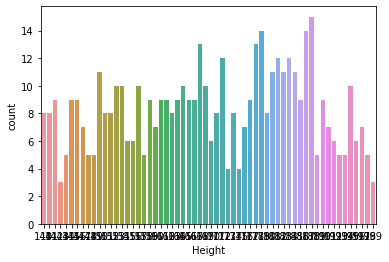

In [6]:
sns.countplot(dataset["Height"])

/Users/kemaldemirel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight', ylabel='count'>

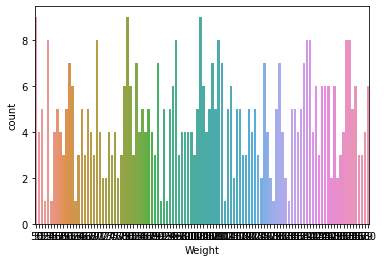

In [7]:
sns.countplot(dataset["Weight"])

/Users/kemaldemirel/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Index', ylabel='count'>

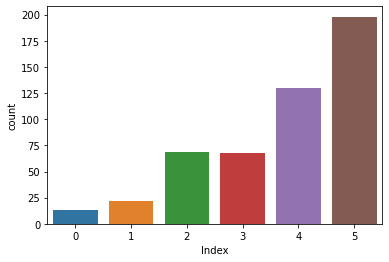

In [8]:
sns.countplot(dataset["Index"])

# Pair-plot

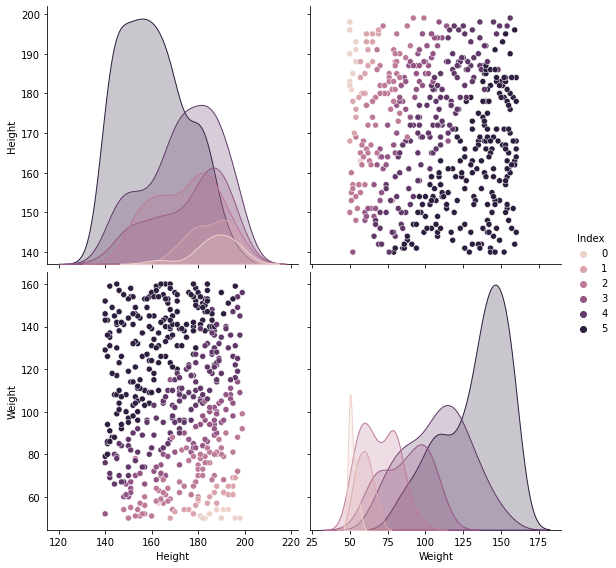

In [9]:
sns.pairplot(dataset, hue="Index", height=4)
plt.show()

# Correlation Matrix

     Height  Weight  Index
0       174      96      4
1       189      87      2
2       185     110      4
3       195     104      3
4       149      61      3
..      ...     ...    ...
495     150     153      5
496     184     121      4
497     141     136      5
498     150      95      5
499     173     131      5

[500 rows x 3 columns]


<AxesSubplot:>

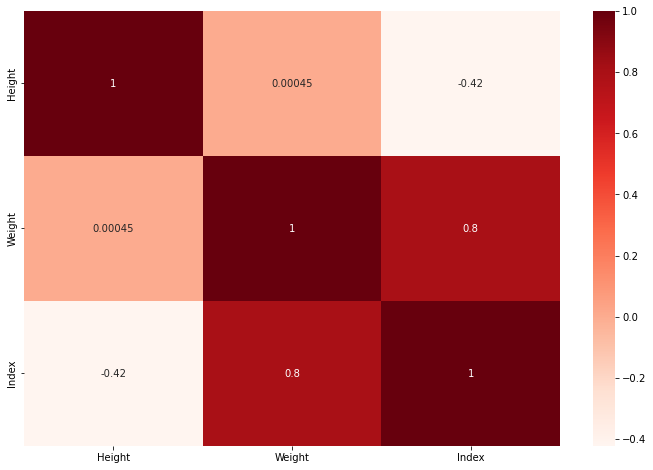

In [10]:
corr = dataset.corr()
print(dataset)

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Reds",annot=True)

# Training

Create Liner Regression Model

In [11]:
lreg = Linear_Regression(learning_rate=0.000005, epoch=1000)

Split dataset to train and test

In [12]:
X=dataset.values.tolist();
y=[];
for row in X:
    y.append(int(row[2]));
    del row[2];
X=pd.Series(X);
y=pd.Series(y);
X_train, X_test, z_train, z_test = train_test_split(X, y, test_size=0.5, shuffle=True);

X_train=X_train.values;
z_train=z_train.values;
x_test=X_test.values;
z_test=z_test.values;

print(X_train.shape)
print(z_train.shape)
print(x_test.shape)
print(z_test.shape)

x_train=[];
y_train=[];
for row in X_train:
    y_train.append(int(row[1]));
    x_train.append(int(row[0]));

(250,)
(250,)
(250,)
(250,)


### Train The Linear Regression Model

In [13]:
temp_x_test = []
temp_y_test = []
for val in x_test:
    temp_x_test.append(val[0])
    temp_y_test.append(val[1])

results = lreg.fit(x_train, y_train, z_train)

sum_test = 0
sum_train = 0

test_mse = []
train_mse = []
accuracy_train = []
accuracy_test = []

from sklearn.metrics import r2_score

for i in range(len(results)):
    z_pred_train_acc = []
    z_pred_test_acc = []
    
    
    for j in range(len(x_train)):
        z_pred_mse_train = (results[i][0]*x_train[j] + results[i][1]*y_train[j] + results[i][2])
        z_pred_mse_test = (results[i][0]*temp_x_test[j] + results[i][1]*temp_y_test[j] + results[i][2])
        
        z_pred_train_acc.append(z_pred_mse_train)
        z_pred_test_acc.append(z_pred_mse_test)
        
        sum_test += (z_pred_mse_test - z_test[j]) ** 2
        sum_train += (z_pred_mse_train - z_train[j]) ** 2
    
    sum_test = sum_test / len(x_train)
    sum_train = sum_train / len(x_train)
    
    test_mse.append(sum_test)
    train_mse.append(sum_train)
    
    
    accuracy_train_result = r2_score(z_train, z_pred_train_acc) * 100
    accuracy_test_result = r2_score(z_test, z_pred_test_acc) * 100
    
    accuracy_train.append(accuracy_train_result)
    accuracy_test.append(accuracy_test_result)
    

z_pred = lreg.predict(temp_x_test, temp_y_test)
z_pred_train = lreg.predict(x_train, y_train)

# Predict Class of Test Values

Rsquare

In [14]:
from sklearn.metrics import r2_score
print("Model Rsquare Train Accuracy:",r2_score(z_pred_train, z_train) )
print("Model Rsquare Test Accuracy:",r2_score(z_pred, z_test) )

Model Rsquare Train Accuracy: 0.7607650675258437
Model Rsquare Test Accuracy: 0.7918101056697106


Başlangıçta elde ettiğim Model Rsquare Train Accuracy ve Model Rsquare Test Accuracy değerleri daha azdı.𝑍 = 𝑚1 ∗ 𝑥 + 𝑚2 ∗ 𝑦 + 𝑏 denklemindeki başlangıçta varsayılan verdiğimiz m1=1,m2=2 ve b=0  değerlerinde değişiklikler yapıp en yüksek başarım veren değerleri seçtim ve eğitimi bu şekilde başlatarak gerçekleştirdim ve en uygun sonucu elde ettim

# Plot the Results

### Loss with Test Data

Normal Scale ve Logaritmic Scale olarak iki grafik çizdim.

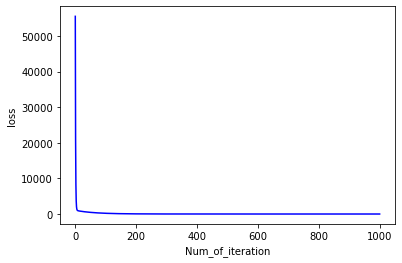

In [15]:
# Normal Scale
rng = np.arange(0,1000)
plt.xlabel('Num_of_iteration')
plt.ylabel('loss')
plt.plot(rng, test_mse, color='b')
plt.show()

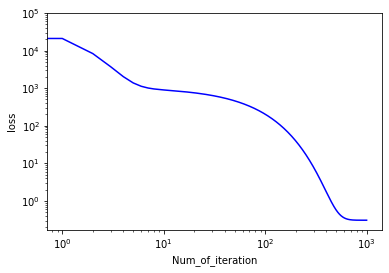

In [16]:
# Logarithmic Scale
rng = np.arange(0,1000)
plt.xlabel('Num_of_iteration')
plt.ylabel('loss')
plt.plot(rng, test_mse, color='b')
plt.yscale('log')
plt.xscale('log')
plt.show()

Test verisi üzerinde eğitim verileri test edilirken her epoch'da hata miktarı azalmaktadır.Loss her iterasyonda azalmış fakat bazı iterasyonlardan sonra hata miktarında ciddi şekilde bir azalma gözlemlenmektedir. Belirli bir iterasyondan sonra hata payında azalma miktarı neredeyse sıfıra inmiştir ve bu da yaklaşık 800-900 iterasyon aralığında gerçekleşmiştir.Epoch 1000 seçilmesi gayet ideal olmuş ve yaklaşık 800.iterasyondan sonra hata miktarında azalma nerdeyse hiç olmamıştır ve eğitim 1000. epoch'da sonlandırılmıştır.Daha fazla iterasyon yapmak loss'da nerdeyse hiç azalmaya sebeb olmaz ve boşuna makinayı eğitmekle meşgul oluruz ve verimlilik azalır.  

### Loss with Train Data

Normal Scale ve Logaritmic Scale olarak iki grafik çizdim.

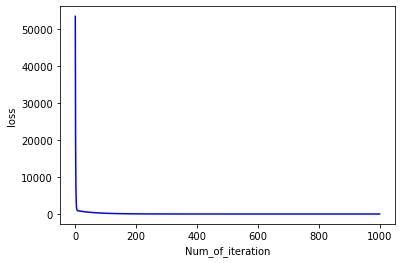

In [17]:
# Normal Scale
rng = np.arange(0,1000)
plt.xlabel('Num_of_iteration')
plt.ylabel('loss')
plt.plot(rng, train_mse, color='b')
plt.show()

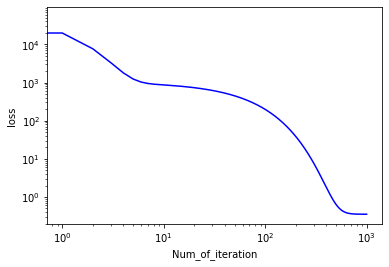

In [18]:
# Logarithmic Scale
rng = np.arange(0,1000)
plt.xlabel('Num_of_iteration')
plt.ylabel('loss')
plt.plot(rng, train_mse, color='b')
plt.yscale('log')
plt.xscale('log')
plt.show()

Train verisi üzerinde eğitim verileri test edilirken her epoch'da hata miktarı azalmaktadır.Loss her iterasyonda azalmış fakat bazı iterasyonlardan sonra hata miktarında ciddi şekilde bir azalma gözlemlenmektedir. Belirli bir iterasyondan sonra hata payında azalma miktarı neredeyse sıfıra inmiştir ve bu da yaklaşık 800-900 iterasyon aralığında gerçekleşmiştir.Epoch 1000 seçilmesi gayet ideal olmuş ve yaklaşık 800.iterasyondan sonra hata miktarında azalma nerdeyse hiç olmamıştır ve eğitim 1000. epoch'da sonlandırılmıştır.Daha fazla iterasyon yapmak loss'da nerdeyse hiç azalmaya sebeb olmaz ve boşuna makinayı eğitmekle meşgul oluruz ve verimlilik azalır.  

### Loss with Test Data vs Train Data

Loss hesabı yapılırken test_data ve train_data kullanılmasında nerdeyse hiç başarım farkı yoktur bu demek olur ki eğitim başarı bir şekilde gerçekleşmiş ve data başarı bir şekilde rastgele %50 %50 olacak şekilde train ve test olacak şekilde ayrılmıştır.

### Accuracy with Test Data

Accuracy için Rsquare tercih edilmiştir.

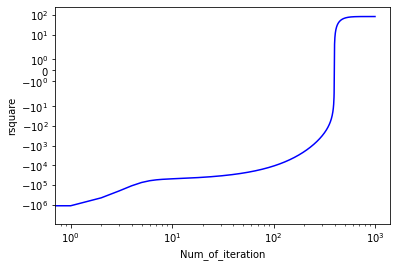

In [19]:
rng = np.arange(0,1000)
plt.xlabel('Num_of_iteration')
plt.ylabel('rsquare')
plt.plot(rng, accuracy_test, color='b')
plt.yscale('symlog')
plt.xscale('log')
plt.show()

Test verisi üzerinde eğitim verileri test edilirken her epoch'da başarım artırılmaktadır.Rsquare her iterasyonda artmış fakat bazı noktalarda başarım çok ciddi şekilde artmış ve bir yerden sonra başarım artışı durma noktasına gelmiştir.Epoch 1000 seçilmesi gayet ideal olmuş ve yaklaşık 800.iterasyondan sonra Rsquare skorunda nerdeyse artış olmamıştır ve eğitim 1000. epoch'da sonlandırılmıştır.Daha fazla iterasyon yapmak Rsquare scorunda nerdeyse hiç artışa sebeb olmaz ve boşuna makinayı eğitmekle meşgul oluruz ve verimlilik azalır.  

### Accuracy with Train Data

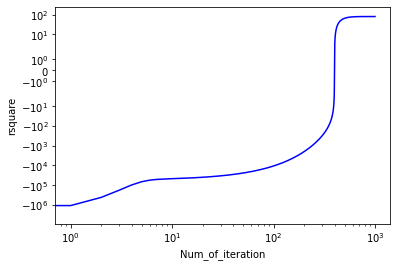

In [20]:
rng = np.arange(0,1000)
plt.xlabel('Num_of_iteration')
plt.ylabel('rsquare')
plt.plot(rng, accuracy_train, color='b')
plt.yscale('symlog')
plt.xscale('log')
plt.show()

Train verisi üzerinde eğitim verileri test edilirken her epoch'da başarım artırılmaktadır.Rsquare her iterasyonda artmış fakat bazı noktalarda başarım çok ciddi şekilde artmış ve bir yerden sonra başarım artışı durma noktasına gelmiştir.Epoch 1000 seçilmesi gayet ideal olmuş ve yaklaşık 800.iterasyondan sonra Rsquare skorunda nerdeyse artış olmamıştır ve eğitim 1000. epoch'da sonlandırılmıştır.Daha fazla iterasyon yapmak Rsquare scorunda nerdeyse hiç artışa sebeb olmaz ve boşuna makinayı eğitmekle meşgul oluruz ve verimlilik azalır.  

### Accuracy with Train Data vs Test Data

Accuracy hesabı yapılırken test_data ve train_data kullanılmasında nerdeyse hiç başarım farkı yoktur bu demek olur ki eğitim başarı bir şekilde gerçekleşmiş ve data başarı bir şekilde rastgele %50 %50 olacak şekilde train ve test olacak şekilde ayrılmıştır.

### 𝑍 = 𝑚1 ∗ 𝑥 + 𝑚2 ∗ 𝑦 + 𝑏     üzerinde değişiklikler yapılması ve bunların yorumlanması

Başlangıçta varsayılan olarak m1=1, m2=2 ve b=0 aldım. m1 ve m2 değerlerini değiştirdiğim zaman başarımda çok fazla bir farklılık gözlemlemedim fakat b değerini değiştirdiğim zaman başarımda ciddi değişimler gözlemledim. Uzun gözlemler sonucunda b=5 olarak aldığımda başarımın alabildiğim en yüksek değer olduğunu gördüm ve varsayılan olarak m1=1, m2=2 ve b=5 aldım.